# Big Mart Sales Prediction

# SM Project 
### Paliwal Mohan Subhash (P2DSC 21019)

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [432]:
train = pd.read_csv("C:\\Users\\Mohan\\Desktop\\SM Project All\\train.csv")
test= pd.read_csv("C:\\Users\\Mohan\\Desktop\\SM Project All\\test.csv")

In [433]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2004,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2014,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2004,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2003,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1992,High,Tier 3,Supermarket Type1,994.7052


In [434]:
train.shape

(8523, 12)

In [435]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
    
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [436]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Only Item_Weight and Outlet_Size have missing values.

Item_Weight is a continuous variable. We can use either mean or median to impute the missing value.
Outlet_Size is a categorical variable so will use mode to impute the missing values in the column

In [437]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2002.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1990.000000,33.290000
25%,8.773750,0.026989,93.826500,1992.000000,834.247400
50%,12.600000,0.053931,143.012800,2004.000000,1794.331000
75%,16.850000,0.094585,185.643700,2009.000000,3101.296400
max,21.350000,0.328391,266.888400,2014.000000,13086.964800


In [438]:
# Exploratory data analysis (EDA)

In [439]:
# Check for duplicates
idsTotal = train.shape[0]
idsDupli = train[train['Item_Identifier'].duplicated()]
print(f'There are {len(idsDupli)} duplicate IDs for {idsTotal} total entries')

There are 6964 duplicate IDs for 8523 total entries


 This shows that our Item_Identifier has some duplicate values. since a product can exist in more than one store it is expected for this repetition.

### Univariate Analysis

C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew is: 1.1775306028542798
Kurtosis: 1.615877


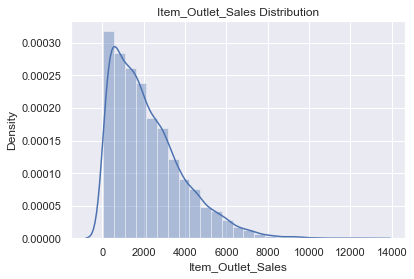

In [440]:
# Distribution of target variable (Item Outlet Sales)
sns.set()
#plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.title("Item_Outlet_Sales Distribution")
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

#We can see that our target variable is skewed towards the right.

#positively skewed and leptokurtik

In [442]:
# Numerical Variables
num_features = train.select_dtypes(include=[np.number])
num_features.dtypesb

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

 We can see that out of 12 we have only 5 numeric variables.


<AxesSubplot:>

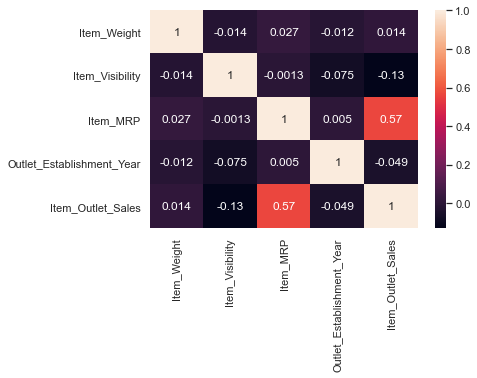

In [443]:
corr=num_features.corr()
sns.heatmap(corr,annot=corr)

 From the above result, we can see that Item_MRP have the most positive correlation and the Item_weight have the lowest correlation with our target variable.

C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Item_Weight Distribution')

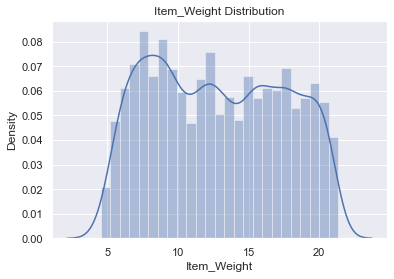

In [444]:
# Item Weight has some missing Values

sns.distplot(train.Item_Weight, bins = 25)
plt.title("Item_Weight Distribution")

 Item Weight : mean ::  12.857645184136183
Null values :  0


C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Item_Weight Distribution')

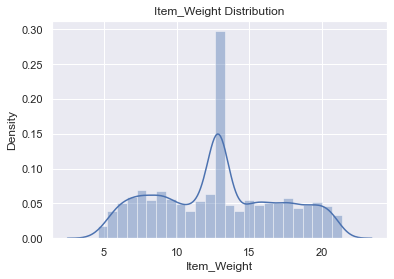

In [445]:
# mean value of "Item_Weight" column

print(" Item Weight : mean :: ", train['Item_Weight'].mean())
# filling the missing values in "Item_weight column" with "Mean" value
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
print("Null values : ", train['Item_Weight'].isnull().sum())
sns.distplot(train.Item_Weight, bins = 25)
plt.title("Item_Weight Distribution")

C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


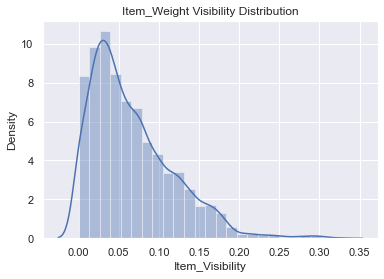

In [446]:
# Item Visibility distribution
sns.distplot(train.Item_Visibility, bins = 25)
plt.title("Item_Weight Visibility Distribution")
plt.show()

We noticed that the minimum value here is 0,
which makes no practical sense. 

Lets consider it like missing information and impute it with mean visibility of that product.

In [448]:
#Determine average visibility of a product
visibility_avg = train.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (train['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
train.loc[missing_values,'Item_Visibility'] = train.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(train['Item_Visibility'] == 0))

Number of 0 values initially: 526
Number of 0 values after modification: 0


C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


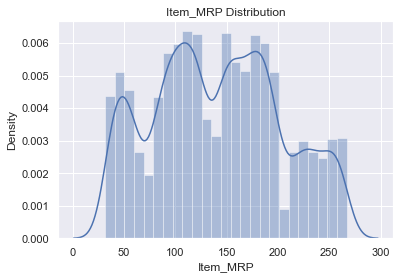

In [449]:
# Item MRP distribution
sns.distplot(train.Item_MRP, bins = 25)
plt.title("Item_MRP Distribution")
plt.show()

MRP is given in US Dollars.

Item Price categorize in four parts.

Price frequency is max between 100-200 USD. 


### Categorical Variables

C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

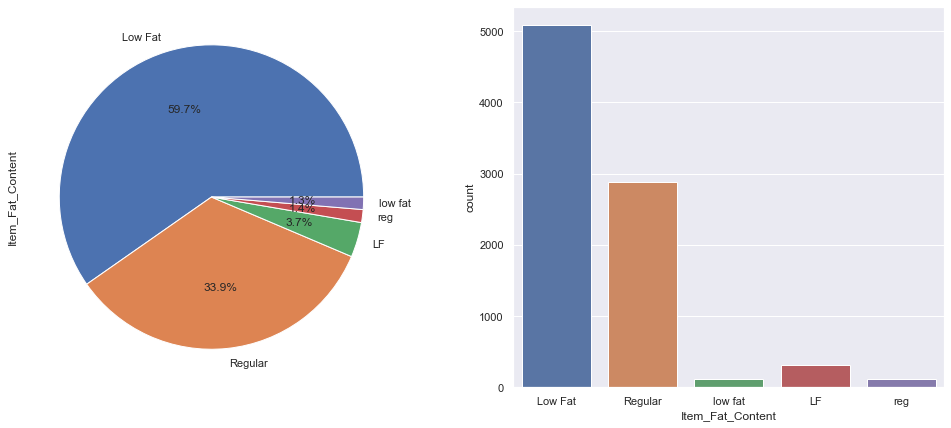

In [450]:
# Distribution of the variable Item_Fat_Content

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
train['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Item_Fat_Content'])
train['Item_Fat_Content'].value_counts()


#Different low fat categories need to be merged. Same must be done with regular categories.

Low Fat products are much more than Regular products. 

around 60% food are low fat content and 34% food are regular fat content

In [452]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat',
                                  'low fat':'Low Fat',
                                  'reg':'Regular'})

print(train['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

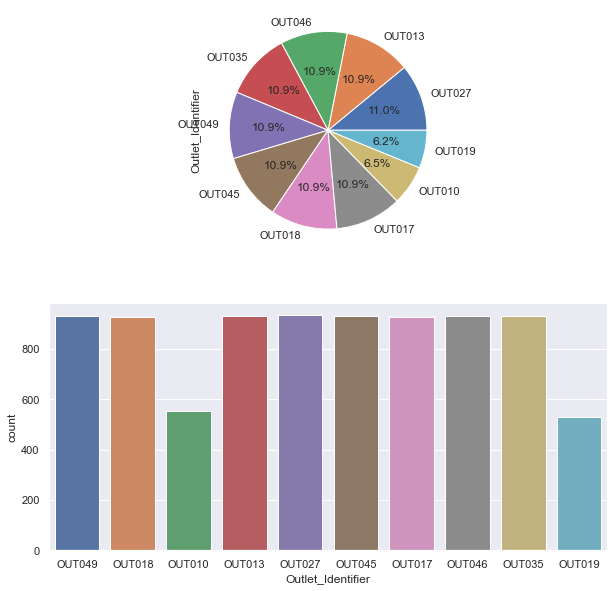

In [453]:
#  Distribution of the variable Outlet_Identifier 
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
train['Outlet_Identifier'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(2,1,2)
sns.countplot(train['Outlet_Identifier'])
train['Outlet_Identifier'].value_counts()

 There are 10 outlets which are almost balanced except for two outlets (OUTO10, OUTO19)

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


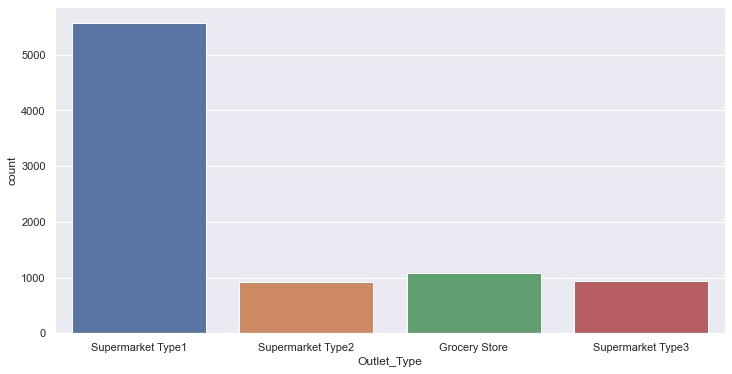

In [455]:
#  Distribution of the variable Outlet_Type 
plt.figure(figsize=(12,6))
print(train.Outlet_Type.value_counts())
sns.countplot(train.Outlet_Type);

5500 outlet are of supermarket type1 while no. of supermarket type 2 and supermarket type 3 are less than 1000 

C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

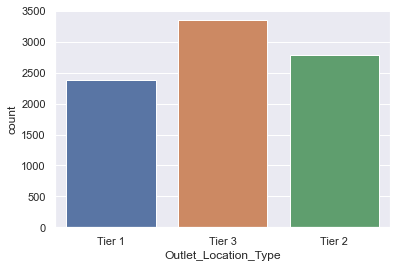

In [457]:
sns.countplot(train.Outlet_Location_Type)

nearly 3300 outlet are in tier 3 city while tier 1 and tier 2 city having 2300 and 2750 outlet respectively

C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

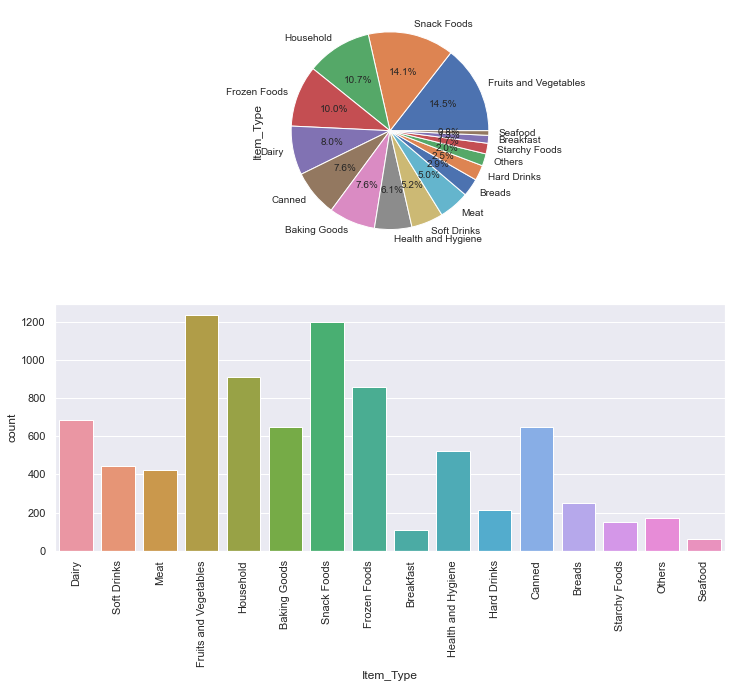

In [459]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
train['Item_Type'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'fontsize':10})
plt.subplot(2,1,2)
sns.countplot(train['Item_Type'])
plt.xticks(rotation = 90)
train['Item_Type'].value_counts()

14.5% item are of Fruits and Vegetables type and 14.1% food item are of Snack Foods type 

these two food having highest share amond all food type

C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1990    1463
1992     932
2004     930
2002     930
2009     930
2007     929
2014     928
2012     926
2003     555
Name: Outlet_Establishment_Year, dtype: int64

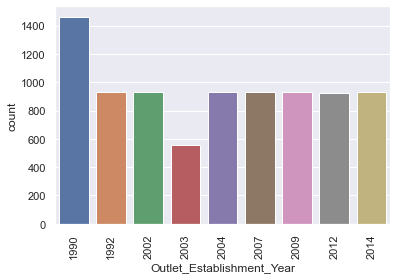

In [461]:
# Outlet_Establishment_Year

sns.countplot(train['Outlet_Establishment_Year'])
plt.xticks(rotation = 90)
train['Outlet_Establishment_Year'].value_counts()
# Most outlets were opened in 1985 and least in 1998

C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

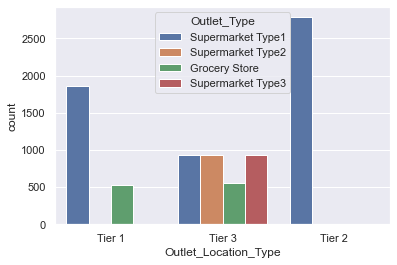

In [462]:
sns.countplot(train['Outlet_Location_Type'],hue=train['Outlet_Type'])

 tier 3 city having all type of store supermarket type 1, type 2, type 3 and grocery store
 
 while tier2 city having only supermarket  type 1 store

C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

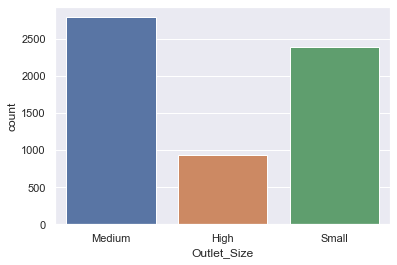

In [464]:
sns.countplot(train.Outlet_Size)

 There seems to be less number of stores with size equals to “High”.

In [466]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

##### Bivariate Analysis

In [467]:
# relationship between our target variable and predictors.

In [468]:
# act of Item_Fat_Content on Item_Outlet_Sales

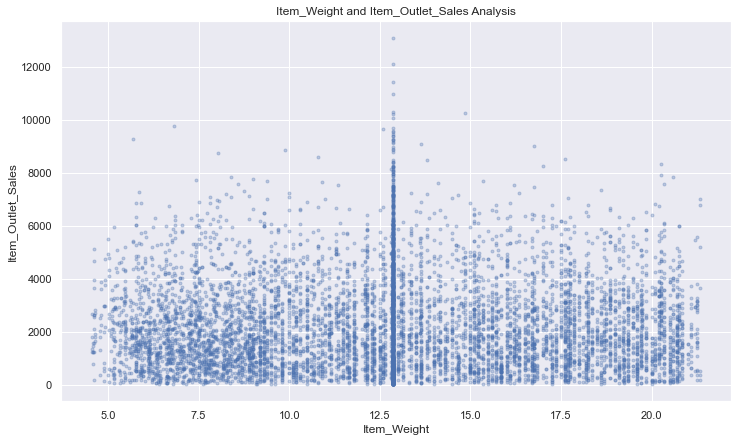

In [469]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

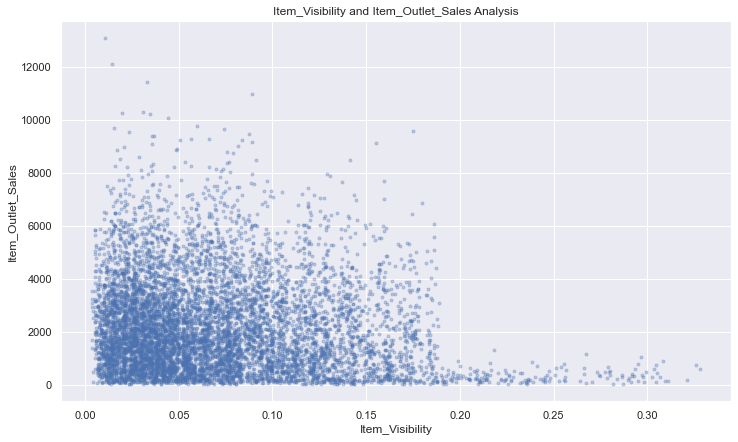

In [470]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

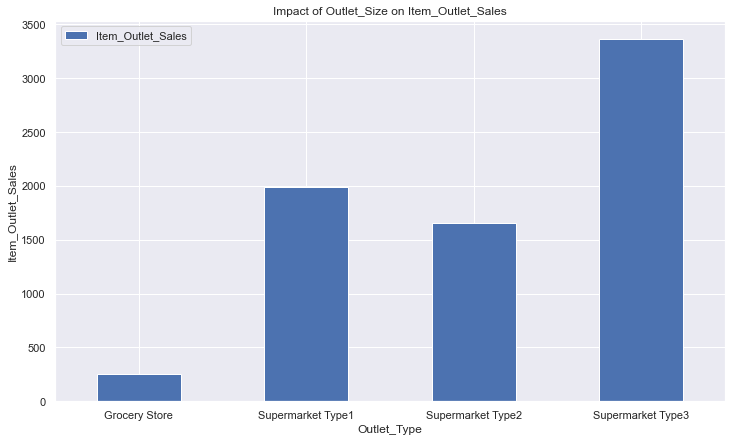

In [471]:
#Impact of Outlet_Type on Item_Outlet_Sales

Outlet_Type_pivot = train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar',figsize=(12,7))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Supermarket type 3 has maximum item outlet sales as compared to others.

Grocery Store has minimum item outlet sales

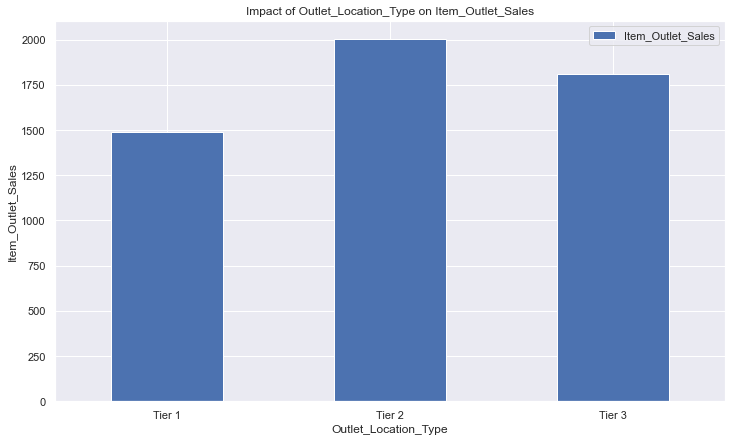

In [472]:
Outlet_Location_Type_pivot = train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar',figsize=(12,7))
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Tier 2 cities have the higher sales than the Tier 1 and Tier 2.

# data Preprocessing

In [474]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2004,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2014,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2004,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,2003,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1992,High,Tier 3,Supermarket Type1,994.7052


In [475]:
# Fill Null Values 
# for numerical variable we usec mean of the variable
# for categorical variable we used Mode of the class 

In [476]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [477]:
train.Outlet_Size.fillna(train.Outlet_Size.mode()[0],inplace=True)

In [478]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [479]:
X =train['Item_MRP']
Y = train['Item_Outlet_Sales']

### Normalization and Data Encoding

In [480]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [ ]:
t

In [481]:
train['Item_Identifier'] = encoder.fit_transform(train['Item_Identifier'])
train['Item_Fat_Content'] = encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = encoder.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = encoder.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = encoder.fit_transform(train['Outlet_Type'])

In [482]:
train["Outlet_Establishment_Year"]=2015-train["Outlet_Establishment_Year"]

In [483]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,11,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,1,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,11,1,0,1,2097.2700
3,1121,19.20,1,0.015274,6,182.0950,0,12,1,2,0,732.3800
4,1297,8.93,0,0.008082,9,53.8614,1,23,0,2,1,994.7052


In [484]:
from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler().fit(train)
#trainNorm = min_max_scaler.transform(train)
#trainNorm=pd.DataFrame(trainNorm)
col=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']
for i in col:
    train[i]=(train[i]-train[i].min())/(train[i].max()-train[i].min())


C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew is: 1.1775306028542798
Kurtosis: 1.615877


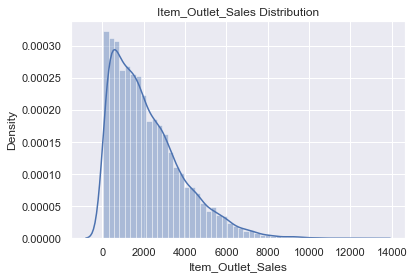

In [485]:
# Distribution of target variable (Item Outlet Sales)
sns.set()
#plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 50)
plt.title("Item_Outlet_Sales Distribution")
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

C:\Users\Mohan\anaconda33\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew is: -0.887753343209305
Kurtosis: 0.552055


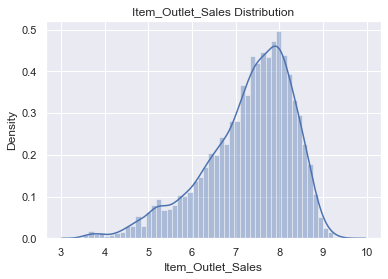

In [486]:
train["Item_Outlet_Sales"]=np.log(train['Item_Outlet_Sales'])

sns.distplot(train.Item_Outlet_Sales, bins = 50)
plt.title("Item_Outlet_Sales Distribution")
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

In [487]:
X=train.drop(["Item_Outlet_Sales"], axis = 1)
Y=train["Item_Outlet_Sales"]

In [488]:
X.head()
#train.columns

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.416667,0.5,0.0,0.333333
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,0.000000,0.5,1.0,0.666667
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.416667,0.5,0.0,0.333333
3,0.719512,0.871986,1.0,0.036017,0.400000,0.640093,0.000000,0.458333,0.5,1.0,0.000000
4,0.832478,0.260494,0.0,0.013877,0.600000,0.095805,0.111111,0.916667,0.0,1.0,0.333333


In [489]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [490]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# simple Linear Regression

In [491]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [492]:
X =train['Item_MRP']
#Y = train["item_outlet_sales"] #.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [493]:
import statsmodels.formula.api as smf
SL = smf.ols(formula='Item_Outlet_Sales ~ Item_MRP', data = train).fit()
# print the coefficients
print("prameters :\n" ,
      SL.params)
Y_pred = SL.predict(X_test)
print(f" Mean Absolute Error: { MAE(Y_test, Y_pred)}\n")
print(f" Mean Squared Error: {MSE(Y_test, Y_pred)}\n")
print(f"Root Mean Squared Error: {np.sqrt(MSE(Y_test, Y_pred))}\n")
print(f" R^2 Score: {r2_score(Y_test, Y_pred)}\n")
SL.summary()

prameters :
 Intercept    6.383351
Item_MRP     1.961172
dtype: float64
 Mean Absolute Error: 0.669183155335408

 Mean Squared Error: 0.7823276572776514

Root Mean Squared Error: 0.884492881417172

 R^2 Score: 0.2587275738703093



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     2990.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:14:29   Log-Likelihood:                -10956.
No. Observations:                8523   AIC:                         2.192e+04
Df Residuals:                    8521   BIC:                         2.193e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3834      0.019    332.421      0.000       6.346       6.421
Item_MRP       1.9612      0.036     54.683      0.000       1.891       2.031
==============================================================================
Omnibus:                     1471.079   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2369.555
Skew:                          -1.195   Prob(JB):                         0.00
Kurtosis:                       3.980   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

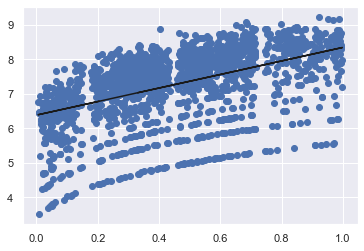

In [494]:
plt.scatter(X_test, Y_test, color ='b')
plt.plot(X_test, Y_pred, color ='k')
plt.show()

# Multiple Linear Regression

In [495]:
X=train.drop(["Item_Outlet_Sales"], axis = 1)
Y=train["Item_Outlet_Sales"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [496]:
#ML model
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train, Y_train)

Y_pred = regressor_mlr.predict(X_test)
print(f" Mean Absolute Error: { MAE(Y_test, Y_pred)}\n")
print(f" Mean Squared Error: {MSE(Y_test, Y_pred)}\n")
print(f"Root Mean Squared Error: {np.sqrt(MSE(Y_test, Y_pred))}\n")
print(f" R^2 Score: {r2_score(Y_test, Y_pred)}\n")

 Mean Absolute Error: 0.5123115107867557

 Mean Squared Error: 0.42058879275059324

Root Mean Squared Error: 0.6485281742149629

 R^2 Score: 0.6014829951300813



In [497]:
regressor_mlr.intercept_

6.379248172169028

In [498]:
regressor_mlr.coef_

array([ 0.01114741, -0.041018  ,  0.02657254, -0.44350244,  0.00634539,
        1.94936956,  0.62911286, -0.42703042, -0.90299908, -0.45173237,
        1.88231724])

# Polynomial Regression (Non-Linear)

In [512]:
#from sklearn.preprocessing import PolynomialFeatures
X=train.drop(["Item_Outlet_Sales","Item_Identifier","Item_Type"], axis = 1)
Y=train["Item_Outlet_Sales"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [513]:
poly= PolynomialFeatures(degree=3, include_bias=True)
X_train_trans =poly.fit_transform(X_train)
X_test_trans= poly.transform(X_test)
#include bias parameter 
mlr=LinearRegression()
mlr.fit(X_train_trans,Y_train)
Y_pred=mlr.predict(X_test_trans)
print(r2_score(Y_test, Y_pred))

print(f" Mean Absolute Error: { MAE(Y_test, Y_pred)}\n")
print(f" Mean Squared Error: {MSE(Y_test, Y_pred)}\n")
print(f"Root Mean Squared Error: {np.sqrt(MSE(Y_test, Y_pred))}\n")
print(f" R^2 Score: {r2_score(Y_test, Y_pred)}\n")

print(mlr.intercept_)
print(mlr.coef_)

0.7476225171313484
 Mean Absolute Error: 0.3963631929842202

 Mean Squared Error: 0.26635536135229043

Root Mean Squared Error: 0.5160962713993296

 R^2 Score: 0.7476225171313484

-26887861503.18783
[ 3.75782743e+08 -5.80547640e+11  1.16366120e+11 -5.74240961e+09
 -5.54127998e+10  2.87821828e+11 -1.24139130e+11  2.06872084e+10
  3.64548326e+10 -9.96280521e+10  1.43932716e-01 -3.65851351e+11
  1.12156791e+00 -1.59465850e-01 -3.98998882e+11  2.14358092e+12
  2.32771389e+12 -8.15857035e+11 -3.32682971e+11  2.92047176e+11
  2.86396109e+11  8.53806254e+11  4.63927423e+11  4.87276562e+11
  5.64557071e+11  1.04236529e+12  4.99068383e+11  1.97779547e+00
 -3.34156661e+00  1.30174377e+11 -3.29777775e+10 -1.27483698e+10
 -1.44097159e+10 -1.76479901e+10 -5.47987366e+00  5.97197861e+09
  6.55479787e+10  1.29530217e+10  1.41693643e+11  2.53081685e+09
  3.77868179e+10  4.89231972e+09  3.29929874e+10 -2.51992033e+11
 -2.77755530e+10 -1.40697845e+10 -1.34173544e+11  2.52628781e+10
  2.63105635e+10  4.8

# Lasso Regression

In [516]:
from sklearn.linear_model import Lasso
regressor_ls = Lasso(alpha = 10000)
regressor_ls.fit(X_train,Y_train)
Y_pred = regressor_ls.predict(X_test)

print(f" Mean Absolute Error: { MAE(Y_test, Y_pred)}\n")
print(f" Mean Squared Error: {MSE(Y_test, Y_pred)}\n")
print(f"Root Mean Squared Error: {np.sqrt(MSE(Y_test, Y_pred))}\n")
print(f" R^2 Score: {r2_score(Y_test, Y_pred)}\n")

print(regressor_ls.intercept_)
print(regressor_ls.coef_)

 Mean Absolute Error: 0.8067107034544668

 Mean Squared Error: 1.0587606705158454

Root Mean Squared Error: 1.028960966468527

 R^2 Score: -0.0031987027724871275

7.308163412366221
[ 0.  0. -0.  0.  0. -0. -0.  0.  0.]


# Ridge Regression

In [515]:
from sklearn.linear_model import Ridge
regressor_rd = Ridge(alpha=10000)
regressor_rd.fit(X_train,Y_train)

Y_pred = regressor_rd.predict(X_test)

print(f" Mean Absolute Error: { MAE(Y_test, Y_pred)}\n")
print(f" Mean Squared Error: {MSE(Y_test, Y_pred)}\n")
print(f"Root Mean Squared Error: {np.sqrt(MSE(Y_test, Y_pred))}\n")
print(f" R^2 Score: {r2_score(Y_test, Y_pred)}\n")

print(regressor_rd.intercept_)
print(regressor_rd.coef_)

 Mean Absolute Error: 0.784730315518141

 Mean Squared Error: 0.9999800908799887

Root Mean Squared Error: 0.9999900453904472

 R^2 Score: 0.052497171546471044

7.22255334838198
[ 0.00019989  0.0016585  -0.02027282  0.08922728  0.05378549 -0.01718151
 -0.02495386  0.01526882  0.08221037]


In [511]:
X_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

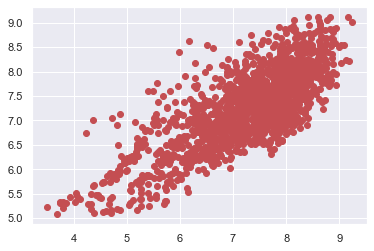

In [509]:
plt.scatter(Y_test, Y_pred, color ='r')
plt.show()

In [313]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')